# Plotting Notebook

29 November 2018
Michael Orella


In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import scipy as sp

colors = {0:(0,0,0),1:(1,0,0),2:(0,0,1),3:(0,0.6,0),4:(0.6,0,0.6),5:(1,0.5490,0),6:(0,0.6,0.6),7:(1,0.8,0),8:(0.6078,0.2980,0),
         9:(0.6,0,0),10:(0,0,0.6)}
fontsize = 8
linewidth = 1
singlecol = 3.3
doublecol = 7
height = 5

## Loading Cases
Load the analysis into memory so that we can easily plot it

### Making alternate figure 5

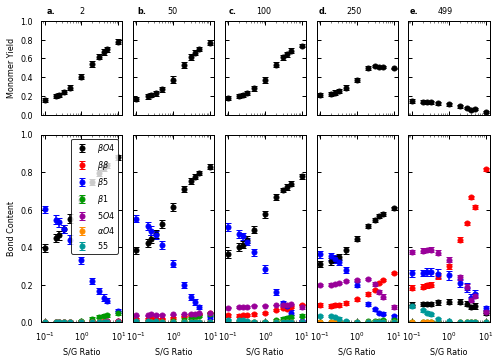

In [18]:
stog = [0.1,0.2,0.25,0.33,0.5,1,2,3,4,5,10]
starts = [2,50,100,250,499]

fig,axes = plt.subplots(2,len(starts),sharex=False,sharey=False,figsize=(doublecol,height),gridspec_kw={'height_ratios':[1,2]})

#Set plot properties
[axes[i,j].set_xscale('log') for i in range(2) for j in range(5)]
[axes[i,j].set_ylim(ylims) for i,ylims in zip(range(2), [[0,1],[0,1]]) for j in range(5)]
[axes[i,j].tick_params(axis = 'both',which = 'major', labelsize = fontsize, direction = 'in',
               pad = 8, top = True, right = True, width = linewidth, length = 4) for i in range(2) for j in range(5)]
[axes[i,j].tick_params(axis = 'both',which = 'minor', labelsize = fontsize, direction = 'in',
               pad = 8, top = True, right = True, width = linewidth/2, length = 2) for i in range(2) for j in range(5)]
[axes[j,k].spines[i].set_linewidth(linewidth) for i in ['top','right','bottom','left'] for j in range(2) for k in range(5)]

axes[0,0].set_ylabel('Monomer Yield',fontsize=fontsize)
axes[1,0].set_ylabel('Bond Content',fontsize=fontsize)

[axes[1,i].set_xlabel('S/G Ratio',fontsize=fontsize) for i in range(len(starts))]

[axes[0,i].set_xticklabels(['']*len(axes[0,0].get_xticklabels())) for i in range(5)]
[axes[j,i].set_yticklabels(['']*len(axes[0,0].get_yticklabels())) for i in range(1,5) for j in range(2)]
[fig.text(*loc,msg,fontsize=fontsize,fontweight='bold') 
 for loc,msg in zip([(0.1,0.98),(0.28,0.98),(0.46,0.98),(0.64,0.98),(0.82,0.98)],
                    ['a.','b.','c.','d.','e.'])]
[fig.text(*loc,str(msg),fontsize=fontsize,ha='center') 
 for loc,msg in zip([(0.17,0.98),(0.35,0.98),(0.53,0.98),(0.71,0.98),(0.89,0.98)],
                    starts)]

#Plot data
for index , startN in enumerate(starts):
    
    with open(f'./results/startNum_1e0add/{startN:0n}_analysis.pkl','rb') as file:
        analysis = pickle.load(file)

    #Get the normal sizes
    nsens = len(analysis)
    nrep = len(analysis[0])

    nmon = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
             for i in range(nrep)] for j in range(nsens)]

    #Extract interesting values from the analyzed data
    monomerYields = [[analysis[j][i]['RCF Yields'][1]/nmon[j][i] 
                      for i in range(nrep)] for j in range(nsens)]
    betaO4Content = [[analysis[j][i]['Bonds']['bo4']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    beta5Content = [[analysis[j][i]['Bonds']['b5']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    betabetaContent = [[analysis[j][i]['Bonds']['bb']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    beta1Content = [[analysis[j][i]['Bonds']['b1']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    fiveO4Content = [[analysis[j][i]['Bonds']['5o4']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    alphaO4Content = [[analysis[j][i]['Bonds']['ao4']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    fivefiveContent = [[analysis[j][i]['Bonds']['55']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]

    #Do statistical analysis
    av_monYield = [np.mean(hist) for hist in monomerYields]; std_monYield = [np.sqrt(np.var(hist)) for hist in monomerYields];
    av_bo4Content = [np.mean(hist) for hist in betaO4Content]; std_bo4Content = [np.sqrt(np.var(hist)) for hist in betaO4Content];
    av_b5Content = [np.mean(hist) for hist in beta5Content]; std_b5Content = [np.sqrt(np.var(hist)) for hist in beta5Content];
    av_bbContent = [np.mean(hist) for hist in betabetaContent]; std_bbContent = [np.sqrt(np.var(hist)) for hist in betabetaContent];
    av_b1Content = [np.mean(hist) for hist in beta1Content]; std_b1Content = [np.sqrt(np.var(hist)) for hist in beta1Content];
    av_5o4Content = [np.mean(hist) for hist in fiveO4Content]; std_5o4Content = [np.sqrt(np.var(hist)) for hist in fiveO4Content];
    av_ao4Content = [np.mean(hist) for hist in alphaO4Content]; std_ao4Content = [np.sqrt(np.var(hist)) for hist in alphaO4Content];
    av_55Content = [np.mean(hist) for hist in fivefiveContent]; std_55Content = [np.sqrt(np.var(hist)) for hist in fivefiveContent];

    #Plot the statistical summaries
    axes[0,index].errorbar(stog,av_monYield,yerr = std_monYield,linestyle='none',marker='.',markersize=10,markerfacecolor='black',markeredgecolor='black',capsize=3,ecolor='black')
    
    axes[1,index].errorbar(stog,av_bo4Content,yerr = std_bo4Content,linestyle='none',marker='.',markersize=10,markerfacecolor=colors[0],markeredgecolor=colors[0],label=r'$\beta O4$',capsize=3,ecolor=colors[0])
    axes[1,index].errorbar(stog,av_bbContent,yerr = std_bbContent,linestyle='none',marker='.',markersize=10,markerfacecolor=colors[1],markeredgecolor=colors[1],label=r'$\beta \beta$',capsize=3,ecolor=colors[1])
    axes[1,index].errorbar(stog,av_b5Content,yerr = std_b5Content,linestyle='none',marker='.',markersize=10,markerfacecolor=colors[2],markeredgecolor=colors[2],label=r'$\beta 5$',capsize=3,ecolor=colors[2])
    axes[1,index].errorbar(stog,av_b1Content,yerr = std_b1Content,linestyle='none',marker='.',markersize=10,markerfacecolor=colors[3],markeredgecolor=colors[3],label=r'$\beta 1$',capsize=3,ecolor=colors[3])
    axes[1,index].errorbar(stog,av_5o4Content,yerr = std_5o4Content,linestyle='none',marker='.',markersize=10,markerfacecolor=colors[4],markeredgecolor=colors[4],label=r'$5O4$',capsize=3,ecolor=colors[4])
    axes[1,index].errorbar(stog,av_ao4Content,yerr = std_ao4Content,linestyle='none',marker='.',markersize=10,markerfacecolor=colors[5],markeredgecolor=colors[5],label=r'$\alpha O4$',capsize=3,ecolor=colors[5])
    axes[1,index].errorbar(stog,av_55Content,yerr = std_55Content,linestyle='none',marker='.',markersize=10,markerfacecolor=colors[6],markeredgecolor=colors[6],label=r'$55$',capsize=3,ecolor=colors[6])

axes[1,0].legend(loc='best',edgecolor='black',fontsize=fontsize)
fig.tight_layout()

#Fill areas on axes that match what people have observed
#axes[1,0].fill([0.1,10,10,0.1],[0.5,0.5,0.62,0.62],facecolor=colors[0],alpha=0.3)
#axes[1,0].fill([0.1,10,10,0.1],[0.02,0.02,0.12,0.12],facecolor=colors[1],alpha=0.3)
#axes[1,0].fill([0.1,10,10,0.1],[0.03,0.03,0.11,0.11],facecolor=colors[2],alpha=0.3)
#axes[1,0].fill([0.1,10,10,0.1],[0.01,0.01,0.07,0.07],facecolor=colors[3],alpha=0.3)
#axes[1,0].fill([0.1,10,10,0.1],[0.02,0.02,0.05,0.05],facecolor=colors[4],alpha=0.3)
#axes[1,0].fill([0.1,10,10,0.1],[0,0,0.08,0.08],facecolor=colors[5],alpha=0.3)
#axes[1,0].fill([0.1,10,10,0.1],[0.01,0.01,0.18,0.18],facecolor=colors[6],alpha=0.3)

#axes[0,0].plot([3,1.11],[x/100 for x in [50,52]],'r.') #Birch
#axes[0,0].plot([1.5,1.05,1.78],[x/100 for x in [44,40,38.4]],'b.') #Wild poplar
#axes[0,0].plot([0.05,0],[x/100 for x in [21,19]],'g.') #Softwood
#axes[0,0].plot([58,2.7,4.56,0.51],[x/100 for x in [78,36,42.8,32.5]],'c.') #GM Poplar

#plt.savefig('../lignin-kmc-output/plots/figure5.svg',format='svg',transparent=True,bbox_inches='tight')


### Making figure 5

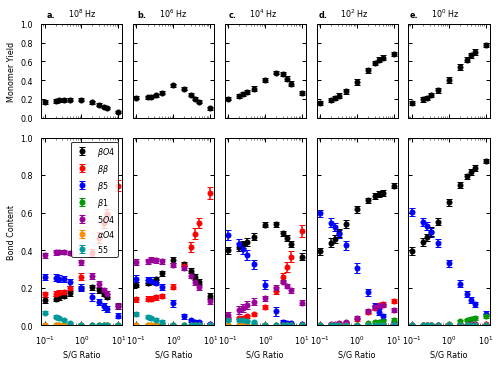

In [19]:
stog = [0.1,0.2,0.25,0.33,0.5,1,2,3,4,5,10]
transports = np.power(10,[0,2,4,6,8])

fig,axes = plt.subplots(2,len(transports),sharex=False,sharey=False,figsize=(doublecol,height),gridspec_kw={'height_ratios':[1,2]})

#Set plot properties
[axes[i,j].set_xscale('log') for i in range(2) for j in range(5)]
[axes[i,j].set_ylim(ylims) for i,ylims in zip(range(2), [[0,1],[0,1]]) for j in range(5)]
[axes[i,j].tick_params(axis = 'both',which = 'major', labelsize = fontsize, direction = 'in',
               pad = 8, top = True, right = True, width = linewidth, length = 4) for i in range(2) for j in range(5)]
[axes[i,j].tick_params(axis = 'both',which = 'minor', labelsize = fontsize, direction = 'in',
               pad = 8, top = True, right = True, width = linewidth/2, length = 2) for i in range(2) for j in range(5)]
[axes[j,k].spines[i].set_linewidth(linewidth) for i in ['top','right','bottom','left'] for j in range(2) for k in range(5)]

axes[0,0].set_ylabel('Monomer Yield',fontsize=fontsize)
axes[1,0].set_ylabel('Bond Content',fontsize=fontsize)

[axes[1,i].set_xlabel('S/G Ratio',fontsize=fontsize) for i in range(len(transports))]

[axes[0,i].set_xticklabels(['']*len(axes[0,0].get_xticklabels())) for i in range(5)]
[axes[j,i].set_yticklabels(['']*len(axes[0,0].get_yticklabels())) for i in range(1,5) for j in range(2)]
[fig.text(*loc,msg,fontsize=fontsize,fontweight='bold') 
 for loc,msg in zip([(0.1,0.98),(0.28,0.98),(0.46,0.98),(0.64,0.98),(0.82,0.98)],
                    ['a.','b.','c.','d.','e.'])]
[fig.text(*loc,msg,fontsize=fontsize,ha='center') 
 for loc,msg in zip([(0.17,0.98),(0.35,0.98),(0.53,0.98),(0.71,0.98),(0.89,0.98)],
                    ['$10^{8}$ Hz','$10^{6}$ Hz','$10^{4}$ Hz','$10^{2}$ Hz','$10^{0}$ Hz'])]

#Plot data
for index , rate in enumerate(transports):
    
    with open(f'./results/2start/{rate:0.0e}_analysis.pkl','rb') as file:
        analysis = pickle.load(file)

    #Get the normal sizes
    nsens = len(analysis)
    nrep = len(analysis[0])

    nmon = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
             for i in range(nrep)] for j in range(nsens)]

    #Extract interesting values from the analyzed data
    monomerYields = [[analysis[j][i]['RCF Yields'][1]/nmon[j][i] 
                      for i in range(nrep)] for j in range(nsens)]
    betaO4Content = [[analysis[j][i]['Bonds']['bo4']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    beta5Content = [[analysis[j][i]['Bonds']['b5']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    betabetaContent = [[analysis[j][i]['Bonds']['bb']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    beta1Content = [[analysis[j][i]['Bonds']['b1']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    fiveO4Content = [[analysis[j][i]['Bonds']['5o4']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    alphaO4Content = [[analysis[j][i]['Bonds']['ao4']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    fivefiveContent = [[analysis[j][i]['Bonds']['55']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]

    #Do statistical analysis
    av_monYield = [np.mean(hist) for hist in monomerYields]; std_monYield = [np.sqrt(np.var(hist)) for hist in monomerYields];
    av_bo4Content = [np.mean(hist) for hist in betaO4Content]; std_bo4Content = [np.sqrt(np.var(hist)) for hist in betaO4Content];
    av_b5Content = [np.mean(hist) for hist in beta5Content]; std_b5Content = [np.sqrt(np.var(hist)) for hist in beta5Content];
    av_bbContent = [np.mean(hist) for hist in betabetaContent]; std_bbContent = [np.sqrt(np.var(hist)) for hist in betabetaContent];
    av_b1Content = [np.mean(hist) for hist in beta1Content]; std_b1Content = [np.sqrt(np.var(hist)) for hist in beta1Content];
    av_5o4Content = [np.mean(hist) for hist in fiveO4Content]; std_5o4Content = [np.sqrt(np.var(hist)) for hist in fiveO4Content];
    av_ao4Content = [np.mean(hist) for hist in alphaO4Content]; std_ao4Content = [np.sqrt(np.var(hist)) for hist in alphaO4Content];
    av_55Content = [np.mean(hist) for hist in fivefiveContent]; std_55Content = [np.sqrt(np.var(hist)) for hist in fivefiveContent];

    #Plot the statistical summaries
    axes[0,len(transports) - 1 - index].errorbar(stog,av_monYield,yerr = std_monYield,linestyle='none',marker='.',markersize=10,markerfacecolor='black',markeredgecolor='black',capsize=3,ecolor='black')
    
    axes[1,len(transports) - 1 - index].errorbar(stog,av_bo4Content,yerr = std_bo4Content,linestyle='none',marker='.',markersize=10,markerfacecolor=colors[0],markeredgecolor=colors[0],label=r'$\beta O4$',capsize=3,ecolor=colors[0])
    axes[1,len(transports) - 1 - index].errorbar(stog,av_bbContent,yerr = std_bbContent,linestyle='none',marker='.',markersize=10,markerfacecolor=colors[1],markeredgecolor=colors[1],label=r'$\beta\beta$',capsize=3,ecolor=colors[1])
    axes[1,len(transports) - 1 - index].errorbar(stog,av_b5Content,yerr = std_b5Content,linestyle='none',marker='.',markersize=10,markerfacecolor=colors[2],markeredgecolor=colors[2],label=r'$\beta 5$',capsize=3,ecolor=colors[2])
    axes[1,len(transports) - 1 - index].errorbar(stog,av_b1Content,yerr = std_b1Content,linestyle='none',marker='.',markersize=10,markerfacecolor=colors[3],markeredgecolor=colors[3],label=r'$\beta 1$',capsize=3,ecolor=colors[3])
    axes[1,len(transports) - 1 - index].errorbar(stog,av_5o4Content,yerr = std_5o4Content,linestyle='none',marker='.',markersize=10,markerfacecolor=colors[4],markeredgecolor=colors[4],label=r'$5O4$',capsize=3,ecolor=colors[4])
    axes[1,len(transports) - 1 - index].errorbar(stog,av_ao4Content,yerr = std_ao4Content,linestyle='none',marker='.',markersize=10,markerfacecolor=colors[5],markeredgecolor=colors[5],label=r'$\alpha O4$',capsize=3,ecolor=colors[5])
    axes[1,len(transports) - 1 - index].errorbar(stog,av_55Content,yerr = std_55Content,linestyle='none',marker='.',markersize=10,markerfacecolor=colors[6],markeredgecolor=colors[6],label=r'$55$',capsize=3,ecolor=colors[6])

axes[1,0].legend(loc='best',edgecolor='black',fontsize=fontsize)
fig.tight_layout()

#Fill areas on axes that match what people have observed
#axes[1,0].fill([0.1,10,10,0.1],[0.5,0.5,0.62,0.62],facecolor=colors[0],alpha=0.3)
#axes[1,0].fill([0.1,10,10,0.1],[0.02,0.02,0.12,0.12],facecolor=colors[1],alpha=0.3)
#axes[1,0].fill([0.1,10,10,0.1],[0.03,0.03,0.11,0.11],facecolor=colors[2],alpha=0.3)
#axes[1,0].fill([0.1,10,10,0.1],[0.01,0.01,0.07,0.07],facecolor=colors[3],alpha=0.3)
#axes[1,0].fill([0.1,10,10,0.1],[0.02,0.02,0.05,0.05],facecolor=colors[4],alpha=0.3)
#axes[1,0].fill([0.1,10,10,0.1],[0,0,0.08,0.08],facecolor=colors[5],alpha=0.3)
#axes[1,0].fill([0.1,10,10,0.1],[0.01,0.01,0.18,0.18],facecolor=colors[6],alpha=0.3)

#axes[0,0].plot([3,1.11],[x/100 for x in [50,52]],'r.') #Birch
#axes[0,0].plot([1.5,1.05,1.78],[x/100 for x in [44,40,38.4]],'b.') #Wild poplar
#axes[0,0].plot([0.05,0],[x/100 for x in [21,19]],'g.') #Softwood
#axes[0,0].plot([58,2.7,4.56,0.51],[x/100 for x in [78,36,42.8,32.5]],'c.') #GM Poplar

plt.savefig('../lignin-kmc-output/plots/figure5.svg',format='svg',transparent=True,bbox_inches='tight')


## C-lignin

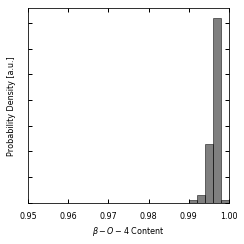

In [37]:
with open(f'C:\\Users\\MikeOrella\\Documents\\GitHub\\lignin-kmc\\results\\cLignin\\slow_results_analysis.pkl','rb') as file:
    analysis = pickle.load(file)


betaO4Content = [analysis[i]['Bonds']['bo4']/sum(analysis[i]['Bonds'].values()) for i in range(len(analysis))]
plt.figure(figsize=(3.5,3.5))
plt.hist(betaO4Content,bins = np.linspace(0.98,1,11),density = 1, facecolor = 'black',alpha = 0.5, edgecolor = 'black')
[plt.gca().tick_params(axis = 'both',which = 'major',labelsize = 8, direction = 'in', pad = 8, top = True, right = True, width = 1, length = 4)]
plt.xlim([0.95,1])
plt.gca().set_yticklabels(['']*len(plt.gca().get_yticklabels()))
plt.xlabel(r'$\beta -O-4$ Content',fontsize = 8)
plt.ylabel('Probability Density [a.u.]',fontsize = 8)
plt.gcf().tight_layout()
plt.savefig('../lignin-kmc-output/plots/clig.svg',format='svg',transparent=True,bbox_inches='tight')

Text(18.125, 0.5, 'Depolymerization Yield')

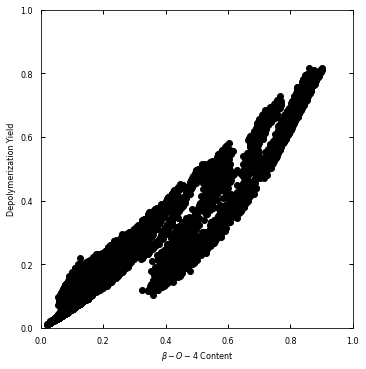

In [50]:
stog = [0.1,0.2,0.25,0.33,0.5,1,2,3,4,5,10]
transports = np.logspace(0,14,15)

fig = plt.figure(figsize = (5,5))
ax = plt.axes()

for index , rate in enumerate(transports):
    
    with open(f'./results/2start/{rate:0.0e}_analysis.pkl','rb') as file:
        analysis = pickle.load(file)

    #Get the normal sizes
    nsens = len(analysis)
    nrep = len(analysis[0])

    nmon = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
             for i in range(nrep)] for j in range(nsens)]

    #Extract interesting values from the analyzed data
    monomerYields = [[analysis[j][i]['RCF Yields'][1]/nmon[j][i] 
                      for i in range(nrep)] for j in range(nsens)]
    betaO4Content = [[analysis[j][i]['Bonds']['bo4']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    beta5Content = [[analysis[j][i]['Bonds']['b5']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    betabetaContent = [[analysis[j][i]['Bonds']['bb']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    beta1Content = [[analysis[j][i]['Bonds']['b1']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    fiveO4Content = [[analysis[j][i]['Bonds']['5o4']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    alphaO4Content = [[analysis[j][i]['Bonds']['ao4']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]
    fivefiveContent = [[analysis[j][i]['Bonds']['55']/sum(analysis[j][i]['Bonds'].values())
                     for i in range(nrep)] for j in range(nsens)]

    #Do statistical analysis
    av_monYield = [np.mean(hist) for hist in monomerYields]; std_monYield = [np.sqrt(np.var(hist)) for hist in monomerYields];
    av_bo4Content = [np.mean(hist) for hist in betaO4Content]; std_bo4Content = [np.sqrt(np.var(hist)) for hist in betaO4Content];
    av_b5Content = [np.mean(hist) for hist in beta5Content]; std_b5Content = [np.sqrt(np.var(hist)) for hist in beta5Content];
    av_bbContent = [np.mean(hist) for hist in betabetaContent]; std_bbContent = [np.sqrt(np.var(hist)) for hist in betabetaContent];
    av_b1Content = [np.mean(hist) for hist in beta1Content]; std_b1Content = [np.sqrt(np.var(hist)) for hist in beta1Content];
    av_5o4Content = [np.mean(hist) for hist in fiveO4Content]; std_5o4Content = [np.sqrt(np.var(hist)) for hist in fiveO4Content];
    av_ao4Content = [np.mean(hist) for hist in alphaO4Content]; std_ao4Content = [np.sqrt(np.var(hist)) for hist in alphaO4Content];
    av_55Content = [np.mean(hist) for hist in fivefiveContent]; std_55Content = [np.sqrt(np.var(hist)) for hist in fivefiveContent];
    
    ax.scatter(betaO4Content,monomerYields,color='black')

fig.tight_layout()
ax.tick_params(axis = 'both',which = 'major',labelsize = 8, direction = 'in', pad = 8, top = True, right = True, width = 1, length = 4)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel(r'$\beta-O-4$ Content',fontsize = 8)
ax.set_ylabel(r'Depolymerization Yield',fontsize = 8)